In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
from cartopy.mpl.geoaxes import GeoAxes
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
from matplotlib import ticker
import matplotlib.patches as mpatches

from satpy import Scene, find_files_and_readers
from satpy.writers import get_enhanced_image
from datetime import datetime
import numpy as np
from satpy import MultiScene



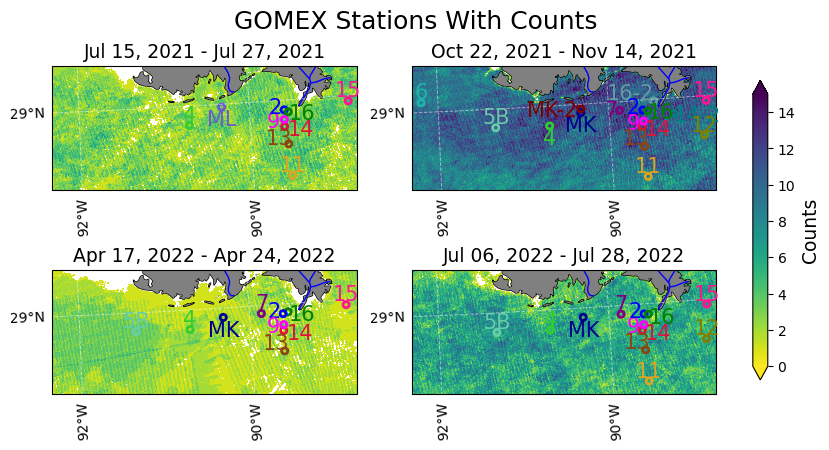

In [7]:
#This makes a figure for the station locations. They're overlayed on count data, so that we can see which 
#     satellite coordinates have the most data for each cruise that we can compare with in-situ data

#creating a list of files to be used for the underlying data. This is pretty much the same as the count 
#     data figures.
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=29.3
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(8.2, 4.4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021',
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM300.count('time')
        

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=15, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap='viridis_r')
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', 
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue',
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.7, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
        
        
        #This is where we add additional stuff for station points. I have a csv file with station locations,
        #     which I got as averages of the in-situ data coordinates for each station. I have them sorted
        #     based on what station we have data for for each cruise
        
        #Reading the csv file with station names and coordinates
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        # Deciding on size parameters for labels
        circlesize = 20
        edgesize = 2
        fontsize = 15
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 0 and c == 'SU21': #this establishes station points we want to plot for the cruise SU21
                #pulling lat, lon, and station name information from the CSV file
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']

                #creates a loop to plot each station
                for (x, y, name) in zip(lons, lats, station):
                    if name == '2': #for station 2
                        #plots the data like a scatter plot with 1 point, overlayed on the counts data we made
                        #     earlier
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        #text for the label. I had to tweak the x and y values for each point, since the
                        #    stations are packed pretty close together. For every other station, it's pretty much
                        #    the same process.
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    if name == '13':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.12, y-0.04, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                    
                    elif name == 'ML':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='slateblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='slateblue')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                        
            elif i == 1 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                
                for (x, y, name) in zip(lons, lats, station):
                                    
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '13':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                        
                    elif name == 'MK':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == 'MK-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='maroon',
                            linewidth=edgesize)
                        ax.text(x-0.04, y-0.01, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='maroon')
                    
                    elif name == '16-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='cadetblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='bottom', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='cadetblue')
                    
                    elif name == '14-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='teal',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='teal')
                        
                    elif name == '7':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '6':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='lightseagreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='lightseagreen')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')

                    elif name == '12':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='olive',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='olive')

                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')

                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')

                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')

                        
                        
            elif i == 2 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                
                for (x, y, name) in zip(lons, lats, station):
                    
                    ### 7, 4, 5B, 15, MK, 13
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '7':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                    elif name == 'MK':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == '13':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                                    
                        
                        
            elif i == 3 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                
                
                for (x, y, name) in zip(lons, lats, station):
                    
                    ### 4, 5B, 7, 15, 13, 12, 11, MK
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')
                        
                    elif name == '7':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                    elif name == '13':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                        
                    elif name == '12':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='olive',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='olive')
                        
                    elif name == 'MK':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')             
 
    except:
        ax.remove()
        pass
    
fig.suptitle('GOMEX Stations With Counts', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('Counts', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task3/StationCounts.png')

# No Data

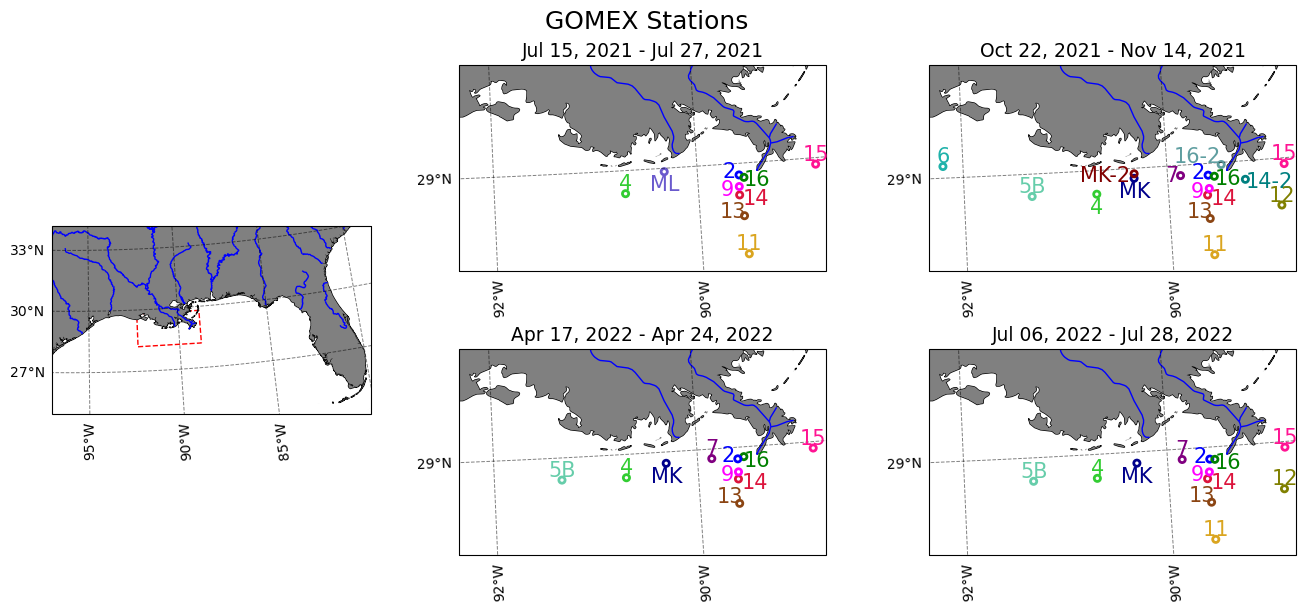

In [2]:
# This cell is the same as above, but it produces images with no background data. It makes a cleaner looking
#     figure, which is better for visualizing station locations for each cruise

cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()



resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 3, constrained_layout=True, figsize=(14, 6),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021', '',
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']




for i, ax in enumerate(axgr.flatten()):
    try:
        if i==3:
            fig.delaxes(ax)
            continue
        if i==0:
            ax.coastlines()
            
            lat_top=33
            lat_bot=25
            lon_left=-97
            lon_rigth=-80
            extent=[lon_left, lon_rigth, lat_bot, lat_top]

            ax.set_extent(extent)



            ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                        name='land',
                                                        facecolor='grey', # change color here
                                                        scale='10m')) 
            ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                        name='rivers_lake_centerlines',
                                                        edgecolor='blue', # change color here
                                                        facecolor='none',
                                                    scale='10m'))
            gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[27, 30, 33], 
                 xlocs=[-95, -90, -85, -80], 
                 draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
            gl.right_labels = False
            gl.top_labels = False
            ax.set_title('', fontsize=13.5)
            ax.set_ylabel('Latitude')
            ax.set_xlabel('Longitude')
            ax.add_patch(mpatches.Rectangle(xy=(-92.3, 28.2), width=3.5, height=1.6, 
                               color='none', ls='--', ec='red', transform=ccrs.PlateCarree(),
                               lw=1))
            
            box = ax.get_position()
            box.y0 = box.y0 - 0.23
            box.y1 = box.y1 - 0.23
            box.x0 = box.x0 - 0.05
            box.x1 = box.x1 - 0.05
            ax.set_position(box)
            
            continue
        
#         ax.scatter(-91, 29, s=500000, c='deepskyblue', transform=ccrs.PlateCarree())
                    
        lat_top=29.8
        lat_bot=28.2
        lon_left=-92.3
        lon_rigth=-88.8
        extent=[lon_left, lon_rigth, lat_bot, lat_top]    
          
        
        ax.coastlines()
        ax.set_extent(extent)
        
        
        
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i-1], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        df = pd.read_csv('/home/hboi-ouri/Downloads/CruiseStationPythonData.csv')
        
        
        circlesize = 20
        edgesize = 2
        fontsize = 15
        for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)
            if i == 1 and c == 'SU21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']

                for (x, y, name) in zip(lons, lats, station):
        
                ### 4, 11, 15,
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '13':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.12, y-0.04, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                    
                    elif name == 'ML':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='slateblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='slateblue')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                        
            elif i == 2 and c == 'FA21':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']
                
                for (x, y, name) in zip(lons, lats, station):
                                    
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '13':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                        
                    elif name == 'MK':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == 'MK-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='maroon',
                            linewidth=edgesize)
                        ax.text(x-0.04, y-0.01, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='maroon')
                    
                    elif name == '16-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='cadetblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='bottom', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='cadetblue')
                    
                    elif name == '14-2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='teal',
                            linewidth=edgesize)
                        ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='teal')
                        
                    elif name == '7':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '6':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='lightseagreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='lightseagreen')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')

                    elif name == '12':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='olive',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='olive')

                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')

                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')

                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')

                        
                        
            elif i == 4 and c == 'SP22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                
                for (x, y, name) in zip(lons, lats, station):
                    
                    ### 7, 4, 5B, 15, MK, 13
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '7':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                    elif name == 'MK':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == '13':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                                    
                        
                        
            elif i == 5 and c == 'SU22':
                lons = df[df['CruiseID']==c]['lon']
                lats = df[df['CruiseID']==c]['lat']
                station = df[df['CruiseID']==c]['Station']                
                
                
                for (x, y, name) in zip(lons, lats, station):
                    
                    ### 4, 5B, 7, 15, 13, 12, 11, MK
                    if name == '2':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='blue',
                            linewidth=edgesize)
                        ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='blue')
                        
                    elif name == '9':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='fuchsia',
                            linewidth=edgesize)
                        ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='fuchsia')
                        
                    elif name == '16':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='green',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='green')
                        
                    elif name == '14':
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                            edgecolors='crimson',
                            linewidth=edgesize)
                        ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='crimson')
                        
                    elif name == '4':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='limegreen',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='limegreen')
                        
                    elif name == '5B':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='mediumaquamarine',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='mediumaquamarine')
                        
                    elif name == '7':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='purple',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='purple')
                        
                    elif name == '15':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='deeppink',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='deeppink')
                        
                    elif name == '13':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='saddlebrown',
                            linewidth=edgesize)
                        ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='saddlebrown')
                        
                    elif name == '12':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='olive',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='olive')
                        
                    elif name == 'MK':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='darkblue',
                            linewidth=edgesize)
                        ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='darkblue')
                        
                    elif name == '11':                        
                        ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                            edgecolors='goldenrod',
                            linewidth=edgesize)
                        ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                                size=fontsize, color='goldenrod')
 
    

    except:
        ax.remove()
        pass
    
fig.suptitle('GOMEX Stations', size=18)

fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task3/StationNoData.png')

# All Stations:

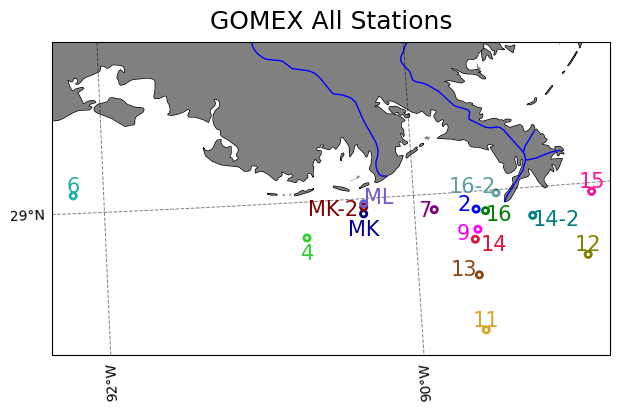

In [8]:
# I jsut have this cell so that I can easily see where the stations are, and tweak the station label locations
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()



resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

# title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021', '',
#          'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']



    

lat_top=29.8
lat_bot=28.2
lon_left=-92.3
lon_rigth=-88.8
extent=[lon_left, lon_rigth, lat_bot, lat_top]    


ax.coastlines()
ax.set_extent(extent)



ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale='10m')) 
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                        scale='10m'))
gl = ax.gridlines(crs=ccrs.PlateCarree(),
     ylocs=[28, 29, 30, 31], 
     xlocs=[-94, -92, -90, -88], 
     draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
#         ax.set_title(title[i-1], fontsize=13.5)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

df = pd.read_csv('/home/hboi-ouri/Downloads/Cruise All Stations Python Data.csv')


circlesize = 20
edgesize = 2
fontsize = 15
for c in df['CruiseID'].unique(): # (this will give you a list of the unique cruise ids)

    if c == 'FA21':
        lons = df[df['CruiseID']==c]['lon']
        lats = df[df['CruiseID']==c]['lat']
        station = df[df['CruiseID']==c]['Station']

        for (x, y, name) in zip(lons, lats, station):

            if name == '2':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='blue',
                    linewidth=edgesize)
                ax.text(x-0.03, y+0.03, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='blue')

            elif name == '9':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='fuchsia',
                    linewidth=edgesize)
                ax.text(x-0.05, y-0.02, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='fuchsia')

            elif name == '16':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='green',
                    linewidth=edgesize)
                ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='green')

            elif name == '14':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='crimson',
                    linewidth=edgesize)
                ax.text(x+0.03, y-0.03, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='crimson')

            elif name == '13':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='saddlebrown',
                    linewidth=edgesize)
                ax.text(x-0.1, y-0.02, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='saddlebrown')

            elif name == 'MK':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='darkblue',
                    linewidth=edgesize)
                ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='darkblue')

            elif name == 'MK-2':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='maroon',
                    linewidth=edgesize)
                ax.text(x-0.04, y-0.01, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='maroon')

            elif name == '16-2':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='cadetblue',
                    linewidth=edgesize)
                ax.text(x, y-0.02, name, va='bottom', ha='right', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='cadetblue')

            elif name == '14-2':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='teal',
                    linewidth=edgesize)
                ax.text(x, y-0.02, name, va='center', ha='left', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='teal')

            elif name == '7':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='purple',
                    linewidth=edgesize)
                ax.text(x-0.02, y, name, va='center', ha='right', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='purple')

            elif name == '6':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='lightseagreen',
                    linewidth=edgesize)
                ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='lightseagreen')

            elif name == '4':                        
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='limegreen',
                    linewidth=edgesize)
                ax.text(x, y-0.03, name, va='top', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='limegreen')

            elif name == '12':                        
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='olive',
                    linewidth=edgesize)
                ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='olive')

            elif name == '5B':                        
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='mediumaquamarine',
                    linewidth=edgesize)
                ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='mediumaquamarine')

            elif name == '11':                        
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='goldenrod',
                    linewidth=edgesize)
                ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='goldenrod')

            elif name == '15':                        
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(), 
                    edgecolors='deeppink',
                    linewidth=edgesize)
                ax.text(x, y, name, va='bottom', ha='center', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='deeppink')

            elif name == 'ML':
                ax.scatter(x, y, s=circlesize, c='none', transform=ccrs.PlateCarree(),
                    edgecolors='slateblue',
                    linewidth=edgesize)
                ax.text(x, y-0.02, name, va='bottom', ha='left', transform=ccrs.PlateCarree(), 
                        size=fontsize, color='slateblue')

    
fig.suptitle('GOMEX All Stations', size=18)

fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task3/AllStationsNoData.png')